In [2]:
#Import dependencies 
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd

In [3]:
df = pd.read_csv("datasetForExp2AndExp3.csv") 
df1 = df

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10998 entries, 0 to 10997
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   0 non-null      float64
 1   Time                   10998 non-null  object 
 2   Global_active_power    10996 non-null  float64
 3   Global_reactive_power  10996 non-null  float64
 4   Voltage                10996 non-null  float64
 5   Global_intensity       10998 non-null  object 
 6   Sub_metering_1         10998 non-null  object 
 7   Sub_metering_2         10998 non-null  object 
 8   Sub_metering_3         10996 non-null  float64
dtypes: float64(5), object(4)
memory usage: 773.4+ KB


Figure(1000x400)


<Axes: xlabel='Voltage'>

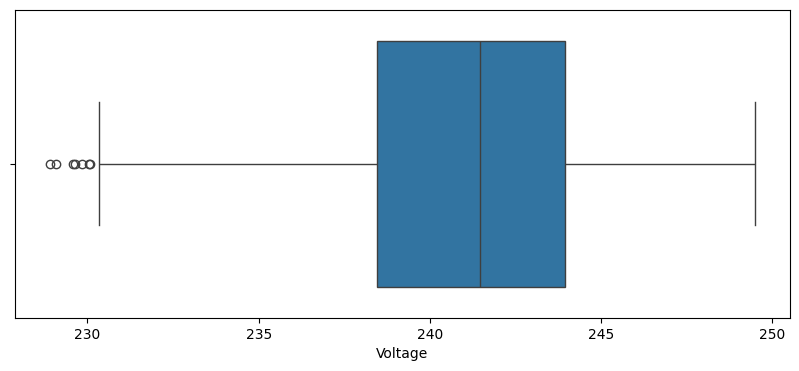

In [5]:
#Checking outliers using boxplot
print(plt.figure(figsize = (10, 4), dpi = 100)) 
sns.boxplot(x = "Voltage", data = df1)

In [6]:
# finding IQR
percentile25 = df1['Voltage'].quantile(0.25)
percentile75 = df1['Voltage'].quantile(0.75)
iqr = percentile75 - percentile25

In [7]:
# finding upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [8]:
# finding outliers using iqr
df1[df1['Voltage'] > upper_limit]
df1[df1['Voltage'] < lower_limit]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1531,NaN,18:55:00,4.006,0.222,229.85,17.400,0.000,0.000,16.0
1533,NaN,18:57:00,4.060,0.304,229.57,17.600,0.000,0.000,16.0
1535,NaN,18:59:00,4.046,0.300,229.63,17.600,0.000,0.000,16.0
1574,NaN,19:38:00,4.842,0.426,230.08,21.200,0.000,0.000,16.0
3007,NaN,19:31:00,6.158,0.442,229.08,27.000,0.000,36.000,0.0
7363,NaN,20:07:00,5.614,0.424,230.04,24.400,37.000,0.000,0.0
7364,NaN,20:08:00,5.296,0.346,228.91,23.200,35.000,1.000,0.0


In [18]:
# trimming outliers
new_df = df1[(df1['Voltage'] < upper_limit) & (df1['Voltage'] > lower_limit)]
new_df.shape

(10989, 9)

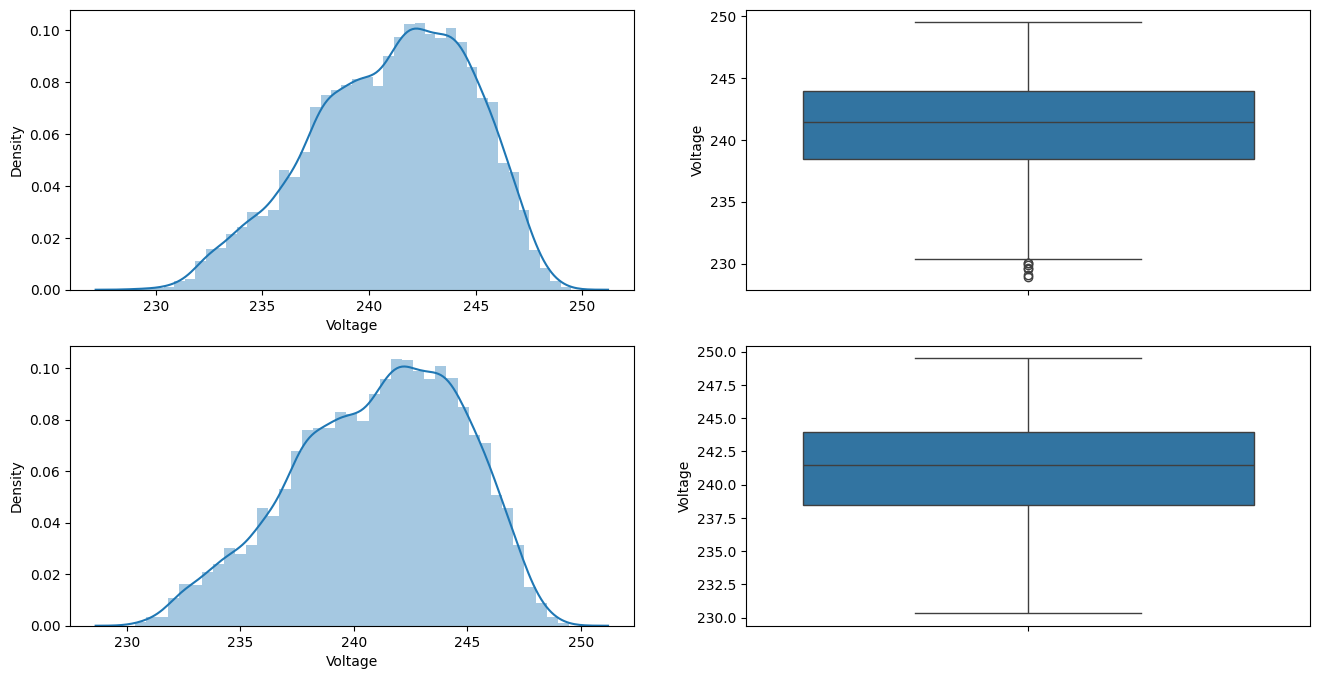

In [21]:
# compare plots after trimming
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df1['Voltage'])
plt.subplot(2,2,2)
sns.boxplot(df1['Voltage'])

plt.subplot(2,2,3)
sns.distplot(new_df['Voltage'])
plt.subplot(2,2,4)
sns.boxplot(new_df['Voltage'])
plt.show()

In [22]:
# finding boundary values for Voltage using z-score
print("Highest allowed",df1['Voltage'].mean() + 3*df1['Voltage'].std())
print("Lowest allowed",df1['Voltage'].mean() - 3*df1['Voltage'].std())

Highest allowed 252.1722199200712
Lowest allowed 229.9633875735629


In [35]:
# finding outliers for Voltage
df1[(df1['Voltage'] > 252.1722199200712) | (df1['Voltage'] < 229.3051022204094)]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
3007,NaN,19:31:00,6.158,0.442,229.08,27.000,0.000,36.000,0.0
7364,NaN,20:08:00,5.296,0.346,228.91,23.200,35.000,1.000,0.0


In [36]:
# Trimming of outliers for bmi
new_df1 = df1[(df1['Voltage'] < 252.1722199200712) & (df1['Voltage'] > 229.3051022204094)]
new_df1

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,NaN,17:24:00,4.216,0.418,234.84,18.400,0.000,1.000,17.0
1,NaN,17:25:00,5.360,0.436,233.63,23.000,0.000,1.000,16.0
2,NaN,17:26:00,5.374,0.498,233.29,23.000,0.000,2.000,17.0
3,NaN,17:27:00,5.388,0.502,233.74,23.000,0.000,1.000,17.0
4,NaN,17:28:00,3.666,0.528,235.68,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
10993,NaN,08:37:00,0.198,0.000,242.87,0.800,0.000,0.000,0.0
10994,NaN,08:38:00,2.042,0.000,241.76,8.800,0.000,0.000,0.0
10995,NaN,08:39:00,1.716,0.000,241.95,8.000,0.000,0.000,0.0
10996,NaN,08:40:00,0.266,0.000,243.73,1.800,0.000,0.000,0.0


Figure(1000x400)


<Axes: xlabel='Voltage'>

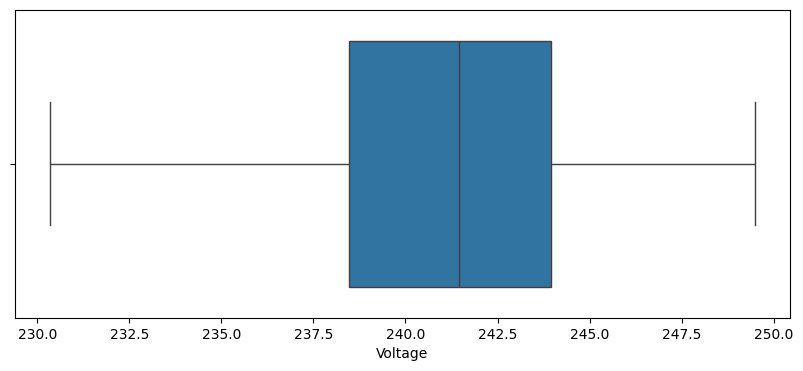

In [41]:
#Checking outliers using boxplot
print(plt.figure(figsize = (10, 4), dpi = 100))
sns.boxplot(x = "Voltage", data = new_df)

In [39]:
df1.to_csv('datasetForExp4.csv', index=False)